# Template of  jupyter notebook for analysis of SAXS/WAXS/GiSAXS/GiWAXS

## Load package

In [1]:
%matplotlib notebook
from pyScatt.packages import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })
T = True
F = False

## Define IO

In [2]:
#inDir =  '/home/group/NSLSII_Data/SMI/2020_Cycle1/AB_CUNNY/AB2_1/'
inDir = '/home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/300KW/'


print('The input dir is: %s'%inDir)



The input dir is: /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/300KW/


In [3]:
outDir = '/home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/'
outDir = create_fullpath(  outDir )

outDir_HDF =  create_dir(  'HDF_Results/', outDir )
outDir_PDF =  create_dir(  'PDF_Report/', outDir )

Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/  already exists
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/HDF_Results/  already exists
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2021_Cycle1/308052_Dinca/Results/PDF_Report/  already exists


## Organize Data 
* the sorting method heavly relies on data acquisition strategy
* Currently, there is no general method for sorting

In [4]:
username_ = 'Dinca'


flist = ls_dir( inDir, and_list=[  username_,  ], no_list=[ 'Cell' ])
_, flists = sort_fnlist( flist,  cut_beg = -24, cut_end=-9, method = 'cut_from_end' ) #for waxs

flists_clean = drop_xyz_float_filenames( flists, pattern_characters = ['_x', '_y', '_z', '_w' ] )
#flists_clean = drop_xyz_float_filenames( flists, pattern_characters = ['_x', '_y', '_d'  ] )

Nf = len( flists)
print('There are %s files for user: %s in this run.'%(Nf, username_))

There are 121 files for user: Dinca in this run.


In [5]:
flists_clean

array(['_Dinca_Zn_PDI_x-18000_y-4820_z1402_waxs00.00_expt1s_sid00268299_000001_WAXS.tif',
       '_Dinca_Mn_PDI_x-11600_y-4820_z1402_waxs00.00_expt1s_sid00268300_000001_WAXS.tif',
       '_Dinca_PDI_Ligand_x-5400_y-4820_z1402_waxs00.00_expt1s_sid00268301_000001_WAXS.tif',
       '_Dinca_RW_1315_x1100_y-4820_z1402_waxs00.00_expt1s_sid00268302_000001_WAXS.tif',
       '_Dinca_Zn_PDI_2_x7600_y-4820_z1402_waxs00.00_expt1s_sid00268303_000001_WAXS.tif',
       '_Dinca_Mn_PDI_32_x13900_y-4820_z1402_waxs00.00_expt1s_sid00268304_000001_WAXS.tif',
       '_Dinca_NiBHT_x20200_y-4820_z1402_waxs00.00_expt1s_sid00268305_000001_WAXS.tif',
       '_Dinca_NiBHT_Neg_x26500_y-4820_z1402_waxs00.00_expt1s_sid00268306_000001_WAXS.tif',
       '_Dinca_NiBHT_Pos_x32800_y-4820_z1402_waxs00.00_expt1s_sid00268307_000001_WAXS.tif',
       '_Dinca_TIBQ_COF_DMA_x39200_y-4820_z1402_waxs00.00_expt1s_sid00268308_000001_WAXS.tif',
       '_Dinca_TIBA_COF_CTAB_x45400_y-4820_z1402_waxs00.00_expt1s_sid00268309_000001_WAXS

In [6]:
flists 

['_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.14_waxs00.00_expt1s_sid00268299_000001_WAXS.tif',
 '_Dinca_Mn_PDI_x-11600.02_y-4819.89_z1402.16_waxs00.00_expt1s_sid00268300_000001_WAXS.tif',
 '_Dinca_PDI_Ligand_x-5400.00_y-4819.90_z1402.20_waxs00.00_expt1s_sid00268301_000001_WAXS.tif',
 '_Dinca_RW_1315_x1100.00_y-4819.89_z1402.22_waxs00.00_expt1s_sid00268302_000001_WAXS.tif',
 '_Dinca_Zn_PDI_2_x7600.00_y-4819.90_z1402.23_waxs00.00_expt1s_sid00268303_000001_WAXS.tif',
 '_Dinca_Mn_PDI_32_x13900.00_y-4819.90_z1402.27_waxs00.00_expt1s_sid00268304_000001_WAXS.tif',
 '_Dinca_NiBHT_x20200.00_y-4819.90_z1402.28_waxs00.00_expt1s_sid00268305_000001_WAXS.tif',
 '_Dinca_NiBHT_Neg_x26500.00_y-4819.89_z1402.30_waxs00.00_expt1s_sid00268306_000001_WAXS.tif',
 '_Dinca_NiBHT_Pos_x32800.00_y-4819.90_z1402.31_waxs00.00_expt1s_sid00268307_000001_WAXS.tif',
 '_Dinca_TIBQ_COF_DMA_x39200.00_y-4819.90_z1402.37_waxs00.00_expt1s_sid00268308_000001_WAXS.tif',
 '_Dinca_TIBA_COF_CTAB_x45400.00_y-4819.90_z1402.36_waxs00.

### Using a two-layered dict to sort the files 

In [7]:
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/generic_functions.py

In [8]:
cut_pattern= r'(_waxs)'

sam_dict, sams = get_Unique_SamDict_from_list( flists, sam_list_clean=flists_clean, 
                                               cut_pattern= cut_pattern, starting_point=  0     )   
#ks =  sorted(list(sams.keys()))
ks =   list(sams.keys())
N = len(ks)
print( 'There are %s samples.'%(N))

There are 11 samples.


In [9]:
sams

{'_Dinca_Zn_PDI_x-18000_y-4820_z1402': 11,
 '_Dinca_Mn_PDI_x-11600_y-4820_z1402': 11,
 '_Dinca_PDI_Ligand_x-5400_y-4820_z1402': 11,
 '_Dinca_RW_1315_x1100_y-4820_z1402': 11,
 '_Dinca_Zn_PDI_2_x7600_y-4820_z1402': 11,
 '_Dinca_Mn_PDI_32_x13900_y-4820_z1402': 11,
 '_Dinca_NiBHT_x20200_y-4820_z1402': 11,
 '_Dinca_NiBHT_Neg_x26500_y-4820_z1402': 11,
 '_Dinca_NiBHT_Pos_x32800_y-4820_z1402': 11,
 '_Dinca_TIBQ_COF_DMA_x39200_y-4820_z1402': 11,
 '_Dinca_TIBA_COF_CTAB_x45400_y-4820_z1402': 11}

In [10]:
ks[0], sam_dict[ks[0]]

('_Dinca_Zn_PDI_x-18000_y-4820_z1402',
 ['_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.14_waxs00.00_expt1s_sid00268299_000001_WAXS.tif',
  '_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.14_waxs06.50_expt1s_sid00268310_000001_WAXS.tif',
  '_Dinca_Zn_PDI_x-17999.95_y-4819.78_z1402.14_waxs13.00_expt1s_sid00268321_000001_WAXS.tif',
  '_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.14_waxs19.50_expt1s_sid00268332_000001_WAXS.tif',
  '_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.13_waxs26.00_expt1s_sid00268343_000001_WAXS.tif',
  '_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.15_waxs32.50_expt1s_sid00268354_000001_WAXS.tif',
  '_Dinca_Zn_PDI_x-17999.95_y-4819.78_z1402.15_waxs39.00_expt1s_sid00268365_000001_WAXS.tif',
  '_Dinca_Zn_PDI_x-17999.94_y-4819.79_z1402.17_waxs45.50_expt1s_sid00268376_000001_WAXS.tif',
  '_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.15_waxs52.00_expt1s_sid00268387_000001_WAXS.tif',
  '_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.16_waxs58.50_expt1s_sid00268398_000001_WAXS.tif',
  '_Dinca_Zn_PDI_x-17

##  Load Mask if has one

In [11]:
#mask  =np.load( '/home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Mask/mask_waxs_2020C3_YG.npy')
#show_img(mask)
mask = None

## Define data analysis parameters and methods

### A GiWAXS

In [12]:
username = 'Dinca'
beamline = 'SMI'
cycle='2021_C1'


#geometry   =  'Reflection'
geometry   =  'Transmission'
det_str =  'Pilatus300kw'

wav_m = 1E-10 * (12.398/16.1)
sdd_mm = 273.9 + 1.4 #for pz = 1400?
b_xy = [96,  1475 - 88  ]   #[ 88, 96  ]
bs_xy = [96, 1250] 
incident_angle = 0
hotpixel_thres = 1e6
  

 


pargs_sc = dict( wav_m = wav_m, 
                sdd_mm = sdd_mm, 
                b_xy =b_xy, 
                bs_xy = bs_xy, 
                incident_angle = incident_angle,             
                det_str = det_str, 
                bs_kind = None, 
                useqx = True,
                geometry =  geometry,                
                username = username, 
                cycle =  cycle, 
                beamline = beamline, 
                outDir = outDir, )
              # mask = mask )
    

rot_angle_start = 0
rot_angle_step = 6.5 
         
## Setup the class
SC = SMI_Scattering( pargs_sc  )
#SC.set_rotation_angles( rot_angle  ) 


### Methods

In [28]:
do_plot = T #True 
#do_inpait = True, make it True, the circular average does not use inpaited data 
do_show_plot = T
save_raw = F
do_qimg = F
do_ciravg = F
save_raw= F
check_stitch = F
do_stitch = F
do_Qciravg = F
show_Qciravg_roi = F 
do_Qciravg_sector = F   
show_Qciravg_sector = F 
do_Qqphi = F 
do_q_qphi = F
do_p_qphi = F  



if T:    
    ###########################
    #for WAXS
    ###########################   
    do_plot_raw = F #T # True
    check_stitch = T
    do_stitch = T ## T
    save_raw = F 
    
    do_plot_stich = F #T # True
    do_Qciravg = F #T
    show_Qciravg_roi = F #T 
    
    
    do_Qciravg_sector = F   
    show_Qciravg_sector = F    
    Qciravg_sector_angle_wid = 10 
    Qciravg_sector_angles = [  10,  30,  50, 70, 90    ]  
    do_Qqphi = F 
    do_q_qphi = F
    do_p_qphi = F   

    
    

In [14]:
sample_list = ks[ :1 ]
#sample_list = ks   #use a dummy papemill to run this
print( sample_list )

['_Dinca_Zn_PDI_x-18000_y-4820_z1402']


In [15]:
sample_list,  sam_dict[sample_list[0]]

(['_Dinca_Zn_PDI_x-18000_y-4820_z1402'],
 ['_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.14_waxs00.00_expt1s_sid00268299_000001_WAXS.tif',
  '_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.14_waxs06.50_expt1s_sid00268310_000001_WAXS.tif',
  '_Dinca_Zn_PDI_x-17999.95_y-4819.78_z1402.14_waxs13.00_expt1s_sid00268321_000001_WAXS.tif',
  '_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.14_waxs19.50_expt1s_sid00268332_000001_WAXS.tif',
  '_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.13_waxs26.00_expt1s_sid00268343_000001_WAXS.tif',
  '_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.15_waxs32.50_expt1s_sid00268354_000001_WAXS.tif',
  '_Dinca_Zn_PDI_x-17999.95_y-4819.78_z1402.15_waxs39.00_expt1s_sid00268365_000001_WAXS.tif',
  '_Dinca_Zn_PDI_x-17999.94_y-4819.79_z1402.17_waxs45.50_expt1s_sid00268376_000001_WAXS.tif',
  '_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.15_waxs52.00_expt1s_sid00268387_000001_WAXS.tif',
  '_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.16_waxs58.50_expt1s_sid00268398_000001_WAXS.tif',
  '_Dinca_Zn_PDI_x-

# Run the data analysis

In [24]:
#q_ch, iq_ch, int_dict_ch

In [88]:
#loop samples
for sam in sample_list:     
    print( 'The sample is: %s.'%sam) 
    fps = sam_dict[sam] 
    print( 'The filelist for this sample is: %s.'%fps)     
    full_filenames = [ inDir +  fp for fp in fps   ] 
    N =  len(full_filenames)        
    RES = {}
    PATH = 'WAXS'

    rot_angle = - np.arange( rot_angle_start,  rot_angle_step * N,  rot_angle_step )
    print('The rotation angles are: %s.'%rot_angle)
    pargs_sc['rotation_angles'] = rot_angle
    pargs_sc['outDir'] = create_fullpath( outDir + PATH + '/')          
    try:
        pz = float( re.search(   r'(_z)(.*)()', sam ).group()[2:]  )
    except:
        pz = 1400
    pargs_sc['sdd_mm'] = sdd_mm  - pz/1000.         
    SC = SMI_Scattering( pargs_sc  ) 
    SC.md['sample'] = sam
    SC.load_data( full_filenames )   
    SC.saved_plots, SC.saved_data  = {}, {}    
    #######################################
    #plot the raw data
    ########################################
    if do_plot_raw:
        run_plot_raw( SC,  vmin= None, vmax=None,mask=None, fontsize=6, )        
    #######################################
    #Stitch WAXS data
    ########################################    
    SC.offset_y   =   - round( ( pz - 4250.0)/172.0,2 ) 
    
    SC.offset_y   = [28]*11
    SC.offset_y[1]   =  26
    SC.offset_y[2]   =  22    
    SC.offset_y[3]   =  20  
    
    SC.offset_y[4]   =  18    
    SC.offset_y[5]   =  18 
    
    SC.offset_y[6]   =  16    
    SC.offset_y[7]   =  14 
    
    SC.offset_y[8]   =  14    
    SC.offset_y[9]   =  14     
    
    SC.offset_y[10]   =  12    
   
    
    #SC.offset_y   = 22
    #SC.offset_y   = 16.5    
    #SC.offset_y   = 28 #for the second image??
    
    if check_stitch:        
        q_ch, iq_ch, int_dict_ch, qx_dict_ch, qz_dict_ch = SC.check_stitich( offset_y = SC.offset_y )  
        peaks = None 
        #run_plot_waxs_check_stitch_SMI( SC, peaks =peaks,xlim= None, ylim=None,fontsize=6, ) 

The sample is: _Dinca_Zn_PDI_x-18000_y-4820_z1402.
The filelist for this sample is: ['_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.14_waxs00.00_expt1s_sid00268299_000001_WAXS.tif', '_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.14_waxs06.50_expt1s_sid00268310_000001_WAXS.tif', '_Dinca_Zn_PDI_x-17999.95_y-4819.78_z1402.14_waxs13.00_expt1s_sid00268321_000001_WAXS.tif', '_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.14_waxs19.50_expt1s_sid00268332_000001_WAXS.tif', '_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.13_waxs26.00_expt1s_sid00268343_000001_WAXS.tif', '_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.15_waxs32.50_expt1s_sid00268354_000001_WAXS.tif', '_Dinca_Zn_PDI_x-17999.95_y-4819.78_z1402.15_waxs39.00_expt1s_sid00268365_000001_WAXS.tif', '_Dinca_Zn_PDI_x-17999.94_y-4819.79_z1402.17_waxs45.50_expt1s_sid00268376_000001_WAXS.tif', '_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.15_waxs52.00_expt1s_sid00268387_000001_WAXS.tif', '_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.16_waxs58.50_expt1s_sid00268398_000001_WAXS.t

In [80]:
- round( ( pz - 4250.0)/172.0,2 ) 

16.56

<IPython.core.display.Javascript object>


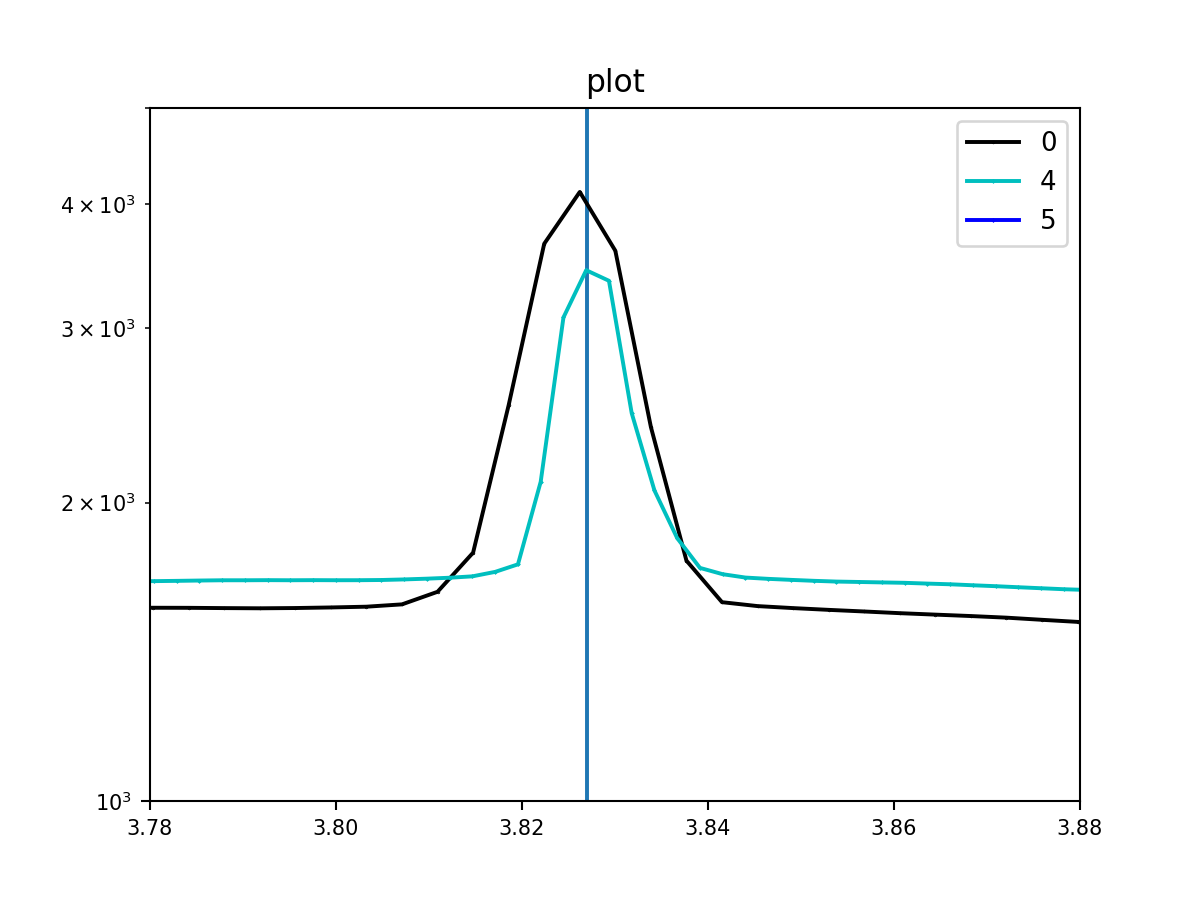

(1000.0, 5000.0)

In [78]:
fig, ax = plt.subplots()
plot1D( x= q_ch[0], y = iq_ch[0], ax=ax, ls='-', m='o', c='k', logy=T, markersize=.3, legend=0)
#plot1D( x= q_ch[1], y = iq_ch[1], ax=ax, ls='-', m='o', c='r', logy=T, markersize=.3, legend=1)
#plot1D( x= q_ch[2], y = iq_ch[2], ax=ax, ls='-', m='o', c='g', logy=T, markersize=.3, legend=2)
#plot1D( x= q_ch[3], y = iq_ch[3], ax=ax, ls='-', m='D', c='b', logy=T, markersize=.3, legend=3)

plot1D( x= q_ch[4], y = iq_ch[4], ax=ax, ls='-', m='D', c='c', logy=T, markersize=.3, legend=4)
plot1D( x= q_ch[5], y = iq_ch[5], ax=ax, ls='-', m='D', c='b', logy=T, markersize=.3, legend=5)


ax.vlines( 3.827, 0, 50e3 )
ax.set_xlim( 3.78,3.88)
ax.set_ylim( 1e3, .5e4)

<IPython.core.display.Javascript object>


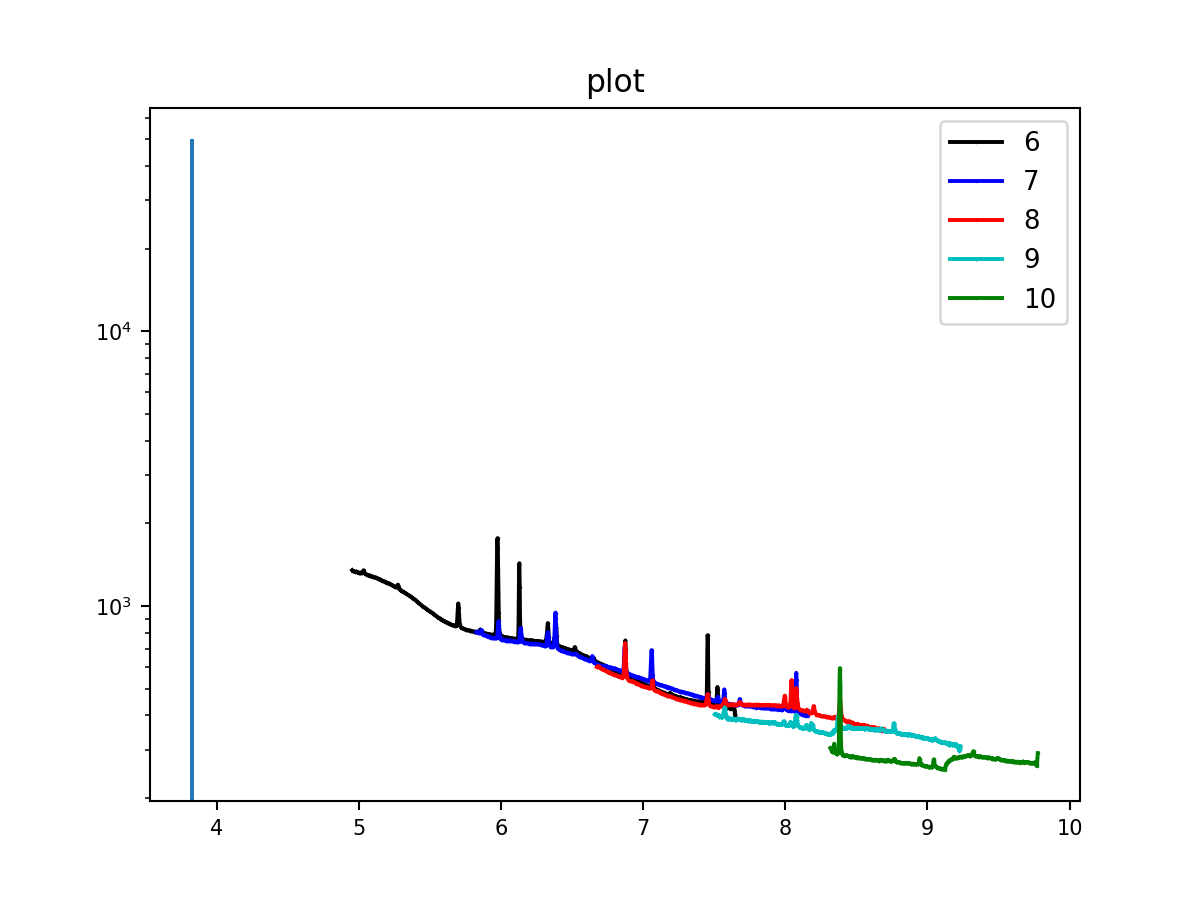

In [89]:
fig, ax = plt.subplots()
#plot1D( x= q_ch[0], y = iq_ch[0], ax=ax, ls='-', m='o', c='k', logy=T, markersize=.3, legend=0)

#j=1
#plot1D( x= q_ch[j], y = iq_ch[j], ax=ax, ls='-', m='o', c='k', logy=T, markersize=.3, legend=j)
# j=2
# plot1D( x= q_ch[j], y = iq_ch[j], ax=ax, ls='-', m='o', c='r', logy=T, markersize=.3, legend=j)
# j=3
# plot1D( x= q_ch[j], y = iq_ch[j], ax=ax, ls='-', m='o', c='c', logy=T, markersize=.3, legend=j)

# j=4
# plot1D( x= q_ch[j], y = iq_ch[j], ax=ax, ls='-', m='o', c='g', logy=T, markersize=.3, legend=j)
# j=5
# plot1D( x= q_ch[j], y = iq_ch[j], ax=ax, ls='-', m='D', c='b', logy=T, markersize=.3, legend=j)


j=6
plot1D( x= q_ch[j], y = iq_ch[j], ax=ax, ls='-', m='o', c='k', logy=T, markersize=.3, legend=j)
j=7
plot1D( x= q_ch[j], y = iq_ch[j], ax=ax, ls='-', m='o', c='b', logy=T, markersize=.3, legend=j)


j=8
plot1D( x= q_ch[j], y = iq_ch[j], ax=ax, ls='-', m='o', c='r', logy=T, markersize=.3, legend=j)
j=9
plot1D( x= q_ch[j], y = iq_ch[j], ax=ax, ls='-', m='D', c='c', logy=T, markersize=.3, legend=j)
j=10
plot1D( x= q_ch[j], y = iq_ch[j], ax=ax, ls='-', m='h', c='g', logy=T, markersize=.3, legend=j)



ax.vlines( 3.827, 0, 50e3 )
#ax.set_xlim( 3.78,3.88)
#ax.set_ylim( 1e3, .5e4)

In [55]:
SC.offset_y  

[28, 26, 22, 22, 28, 28, 28, 28, 28, 28, 28]

In [26]:
#loop samples
for sam in sample_list:     
    print( 'The sample is: %s.'%sam) 
    fps = sam_dict[sam] 
    print( 'The filelist for this sample is: %s.'%fps)     
    full_filenames = [ inDir +  fp for fp in fps   ] 
    N =  len(full_filenames)        
    RES = {}
    PATH = 'WAXS'

    rot_angle = - np.arange( rot_angle_start,  rot_angle_step * N,  rot_angle_step )
    print('The rotation angles are: %s.'%rot_angle)
    pargs_sc['rotation_angles'] = rot_angle
    pargs_sc['outDir'] = create_fullpath( outDir + PATH + '/')          
    try:
        pz = float( re.search(   r'(_z)(.*)()', sam ).group()[2:]  )
    except:
        pz = 1400
    pargs_sc['sdd_mm'] = sdd_mm  - pz/1000.         
    SC = SMI_Scattering( pargs_sc  ) 
    SC.md['sample'] = sam
    SC.load_data( full_filenames )   
    SC.saved_plots, SC.saved_data  = {}, {}    
    #######################################
    #plot the raw data
    ########################################
    if do_plot_raw:
        run_plot_raw( SC,  vmin= None, vmax=None,mask=None, fontsize=6, )        
    #######################################
    #Stitch WAXS data
    ########################################    
    SC.offset_y   =   - round( ( pz - 4250.0)/172.0,2 ) 
    
    SC.offset_y   = [28]*11
    SC.offset_y[1]   =  26
    SC.offset_y[2]   =  22    
    
    
    #SC.offset_y   = 22
    #SC.offset_y   = 16.5    
    #SC.offset_y   = 28 #for the second image??
    
    if check_stitch:        
        q_ch, iq_ch, int_dict_ch, qx_dict_ch, qz_dict_ch = SC.check_stitich( offset_y = SC.offset_y )  
        peaks = None 
        run_plot_waxs_check_stitch_SMI( SC, peaks =peaks,xlim= None, ylim=None,fontsize=6, ) 
        
    if do_stitch:        
        dq_mag = 5        
        qimg_st, msk_st, qx_st, qz_st, sca_st = SC.stitich( dq_mag = dq_mag, offset_y= SC.offset_y, flag_scale= T ) 
        run_save_qimage( SC, dtype='qimg_st'  )         
        run_plot_qimage( SC, dtype='qimg_st' )#zlim=[.5,1]   )  
    else:      
    #######################################
    #Load Stitched WAXS data
    ########################################
        stitch_path = outDir + 'WAXS/Stitch_Data/'
        SC.qimg_st = get_img('Stitch_Data_%s.tiff'%sam, stitch_path) 
        SC.qmask_st = (SC.qimg_st != 0)
        SC.qx_st  = np.array( pds.read_csv( stitch_path + 'Stitch_Data_qx_%s.csv'%sam   )['qx_st'] )
        SC.qz_st  = np.array( pds.read_csv( stitch_path + 'Stitch_Data_qz_%s.csv'%sam   )['qz_st'] )        
    #######################################
    #Plot Stitch WAXS data
    ########################################   
    if do_plot_stich:   
        run_plot_qimage( SC, dtype='qimg_st' )#zlim=[.5,1]   )  
    #######################################
    #Do circular average
    ########################################  
    if do_Qciravg: 
        #qz_roi_range= [ 0.05,  qz_st.max() ] 
        qz_roi_range= None
        #Prange= [0,180]
        Prange= [0,90]
        qmaskn, q_ca,iq_ca,mask_ca = run_qciravg( SC, ciravg_bins=2500, Prange= Prange, Qrange= None,
                           qx_roi_range=None,qz_roi_range=qz_roi_range,dtype='qimg_st',    )
        run_save_ciravg(  SC   )  
        peaks = None 
        run_plot_ciravg( SC, peaks = peaks,xlim= None, ylim=None,fontsize=6, )  
        if show_Qciravg_roi:
            run_plot_qciravg_roi( SC,img_roi=SC.qimg_st*mask_ca,vmin=None,vmax=None,fontsize=6,)  
        
    #######################################
    #Do sector circular average
    ########################################  
    if do_Qciravg_sector:  
        Prange =   [ [w-Qciravg_sector_angle_wid, w+Qciravg_sector_angle_wid] for w in  Qciravg_sector_angles  ]
        qiqs_cas,  qmask_cas = SC.qimg_circular_average_sector(SC.qimg_st , SC.qx_st, SC.qz_st,
                                    Qrange=None,Prange=Prange,bins=1500,mask= qmaskn ) 
        run_save_ciravg_sector( SC  )
        run_plot_ciravg_sector( SC, xlim=[0,8], )#ylim=[.1, 1e5]  )        
        if show_Qciravg_sector:
            run_plot_ciravg_sector_roi( SC  )    
            
    #######################################
    #Do q-phi analysis
    ########################################              
    if do_Qqphi:  
        qphi_bins = [ 500, 180 ];Prange= None;Qrange=None;            
        q_QP, phi_QP, qphi_QP, qphi_mask = SC.qimg_to_qphi(SC.qimg_st, SC.qx_st, SC.qz_st,
                                                  Qrange=Qrange,Prange=Prange,                                                      
                                                  bins=qphi_bins,mask=SC.qmask_st) 
        run_save_Qqphi( SC  )
        run_plot_Qqphi( SC,  fontsize=6, vmin= None, vmax=None, aspect= 0.015, )
        
        if do_q_qphi:
            q_QPq,  iq_QPq = SC.qphi_to_iq( qphi_QP, q_range=q_QP, p_range=phi_QP, )
            run_save_Qqphi( SC   )
            run_plot_q_iq_qphi( SC, peaks = None, xlim= None, ylim=None,fontsize=6, )
            
        if do_p_qphi:  
            #q_range_roi = None 
            qPeak, iqPeak = find_max_peak(q_QPq,  iq_QPq, xrange=[0.1,6])
            q_range_roi = [ qPeak -.05,  qPeak + .05 ]
            p_QPp,  ip_QPp = SC.qphi_to_ip( qphi_QP, q_range=q_QP, p_range=phi_QP, Qrange=q_range_roi ) 
            run_save_q_iq_qphi( SC  )
            run_plot_p_ip_qphi( SC, peaks = None, xlim= None, ylim=None,fontsize=6, )                    
   ## save data to h5 file 
    res = SC.res_to_dict( save_raw=save_raw, do_stitch=do_stitch, 
                 do_ciravg = do_Qciravg, do_ciravg_sector = do_Qciravg_sector,
                 do_qimg=do_qimg, do_qphi = do_Qqphi,  
                do_q_qphi = do_q_qphi, do_p_qphi = do_p_qphi,                         
                        )                        
 
    K='md';res[K] = {};res[K].update( SC.md   )     
    K='saved_data';res[K] = {};res[K].update( SC.saved_data   )     
    K='saved_plots';res[K] = {};res[K].update( SC.saved_plots   ) 
    
    dicttoh5( res, os.path.join(outDir_HDF, '%s.h5'%sam),
                     h5path='/%s/'%PATH, mode='a', overwrite_data=True)   
    
    
print('Done')       

        
    
    
    
    
    

The sample is: _Dinca_Zn_PDI_x-18000_y-4820_z1402.
The filelist for this sample is: ['_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.14_waxs00.00_expt1s_sid00268299_000001_WAXS.tif', '_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.14_waxs06.50_expt1s_sid00268310_000001_WAXS.tif', '_Dinca_Zn_PDI_x-17999.95_y-4819.78_z1402.14_waxs13.00_expt1s_sid00268321_000001_WAXS.tif', '_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.14_waxs19.50_expt1s_sid00268332_000001_WAXS.tif', '_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.13_waxs26.00_expt1s_sid00268343_000001_WAXS.tif', '_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.15_waxs32.50_expt1s_sid00268354_000001_WAXS.tif', '_Dinca_Zn_PDI_x-17999.95_y-4819.78_z1402.15_waxs39.00_expt1s_sid00268365_000001_WAXS.tif', '_Dinca_Zn_PDI_x-17999.94_y-4819.79_z1402.17_waxs45.50_expt1s_sid00268376_000001_WAXS.tif', '_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.15_waxs52.00_expt1s_sid00268387_000001_WAXS.tif', '_Dinca_Zn_PDI_x-17999.94_y-4819.78_z1402.16_waxs58.50_expt1s_sid00268398_000001_WAXS.t

<IPython.core.display.Javascript object>

KeyError: 'qx_st'

In [ ]:
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/plots.py

# THE END